In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# set path
path = r'/Users/kurtson/Desktop/Instacart Basket Analysis'


In [3]:
# import files
ords_prods_merge = pd.read_pickle(os.path.join( path, '02 Data', 'Prepared Data', 'ords_prods_customer_merge_.pkl'))

# You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

Text(0.5, 0, 'Order Hour of Day')

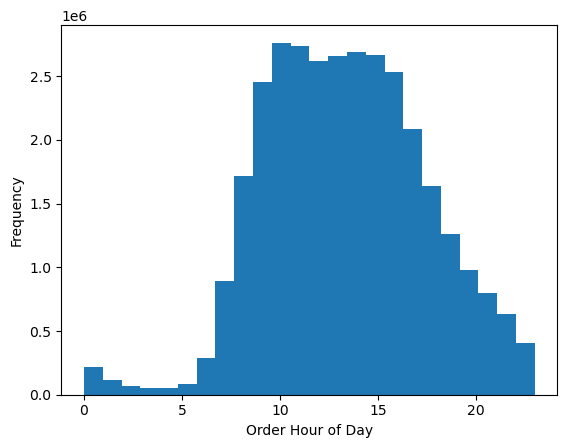

In [4]:
#create histogram

hist = ords_prods_merge['order_hour_of_day'].plot.hist(bins=24)
plt.xlabel('Order Hour of Day', fontsize=10)

#### This histogram is showing the busiest hours of the day and depicts that business is typically going to be the busiest starting at 10 AM. This level is sustained until around 4-5PM. After this business gradually decreases until close.

# The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

In [5]:
#export the visual
hist.figure.savefig(os.path.join(path, '04 Analysis', 'hist_order_hour_of_day.png'))

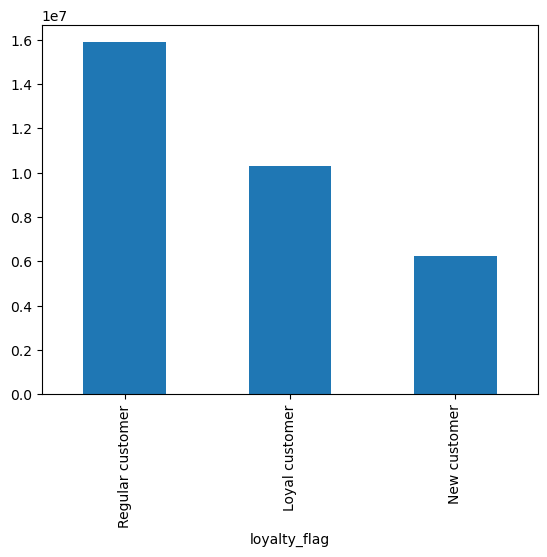

In [23]:
#create bar chart
bar= ords_prods_merge['loyalty_flag'].value_counts().plot.bar() 


In [24]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'loyalty_orders.png'))

### Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [8]:
#set seed
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [9]:
#store 70% in the big dataframe
big = ords_prods_merge[dev]

In [10]:
#store the remaining 30% in the small df
small = ords_prods_merge[~dev]

In [11]:
len(ords_prods_merge)

32406041

In [12]:
len(big)+len(small)

32406041

### Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents: In a markdown cell beneath your line chart, describe what the line chart shows.

In [13]:
ords_prods_merge.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [14]:
df_2 = small[['n_dependants', 'age']]

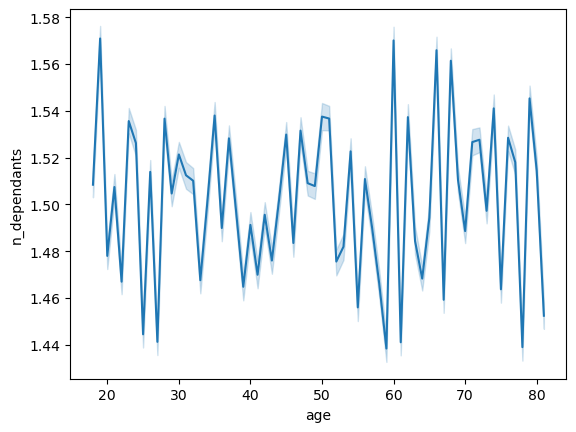

In [15]:
line = sns.lineplot(data = df_2, x = 'age', y = 'n_dependants')

##### The chart above doesn't really dictate any sort of exact trend so there is no direct correlation amongst the instacart users.

In [16]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'linegraph_dependants_age.png'))

### You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

In [ ]:
scatterplot = sns.scatterplot(data = ords_prods_merge, x = 'age', y = 'income')

##### Income increases drastically after reaching 40 years of age. Indicating most older shoppers will likely spend more.

In [18]:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'age_income_scatterplot.png'))